# Task 1 (a) - (d)

In [3]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt

### Function for matrix multiplication

In [4]:
def matrix_multiplication(A, B):
    """
    This function will multiply A and B without using numpy. 
    A matrix is defined as a nested list, with each row being its own list within the list.
    It will also measure the time it takes for the matrix multiplication.
    """
    n = len(A)  # Computing the dimension of A
    matrix_product = [[0 for _ in range(n)] for _ in range(n)]  # Creating a 0 matrix of dimension n
    
    start_time = time.time()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                matrix_product[i][j] += A[i][k] * B[k][j]
    end_time = time.time()
    runtime = end_time - start_time
    #print(f"Matrix of dimension {n} has been processed in {round(runtime,4)} seconds.")
    return n, runtime

##### Performing matrix multiplication using 2 random matrices A and B using my own function and numpy. Time complexity is measured for each method and plotted into graphs for comparison

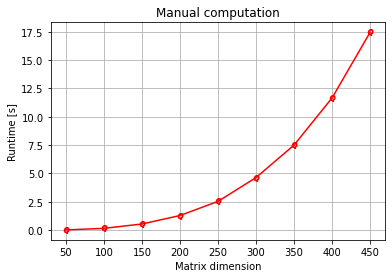

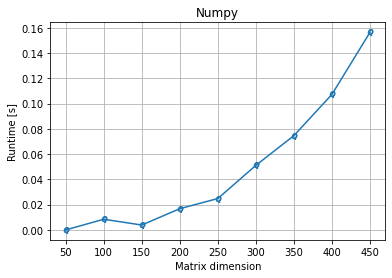

In [ ]:
dimensions = [] # Used to record the dimensions for plotting
runtimes = []   # Used to record the runtimes of each dimension for plotting
runtimes_numpy = []

starting_dimension = 50 # Running the program with these dimensions takes about 18 minutes on my computer. 
end_dimension = 500    # Setting the end_dimension to 500 only takes a few minutes and is sufficient for comparison.
steps = 50

for n in range(starting_dimension,end_dimension,steps):
    A = []

    for i in range(n):
        A_row = []
        for k in range(n):
            A_row.append(random.randint(0,9))
        A.append(A_row)
    
    B = []

    for i in range(n):
        B_row = []
        for k in range(n):
            B_row.append(random.randint(0,9))
        B.append(B_row)
    dimension, runtime = matrix_multiplication(A,B)
    dimensions.append(dimension)
    runtimes.append(runtime)

    start_time = time.time()
    numpy_product = np.matmul(A,B) # Matrix multiplication using numpy 
    end_time = time.time()
    #print(f"Numpy computed a matrix multiplication of dimension {dimension} in {round(end_time-start_time,4)} seconds.")
    runtimes_numpy.append(end_time-start_time)

plt.plot(dimensions, runtimes, marker = ".", color = "Red")
plt.xlabel("Matrix dimension")
plt.ylabel("Runtime [s]")
plt.title("Manual computation")
plt.grid()
plt.show()

plt.plot(dimensions, runtimes_numpy, marker = ".")
plt.xlabel("Matrix dimension")
plt.ylabel("Runtime [s]")
plt.title("Numpy")
plt.grid()
plt.show()

##### The time complexity for my own implementation is much higher that Numpy's implementation. It also increases exponentially with increasing matrix sizes.

##### My implementation contains a triple loop, so the time complexity is O(n^3), so it makes sence that the computations take exponentially longer for increasing n. 

##### Numpy uses more optimized and faster libraries in lower level languages like C to compute matrix multiplications much faster. 

### Task 1 (e): Strassen's algorithm for 2D matrices

In [5]:
def strassens_algorithm(A, B):
    """
    Multiplies two 2D matrices A and B using strassen's algorithm
    """
    A11 = A[0][0]
    A12 = A[0][1]
    A21 = A[1][0]
    A22 = A[1][1]
    B11 = B[0][0]
    B12 = B[0][1]
    B21 = B[1][0]
    B22 = B[1][1]

    M1 = (A11 + A22) * (B11 + B22)
    M2 = (A21 + A22) * B11
    M3 = A11 * (B12 - B22)
    M4 = A22 * (B21 - B11)
    M5 = (A11 + A12) * B22
    M6 = (A21 - A11) * (B11 + B12)
    M7 = (A12 - A22) * (B21 + B22)

    C = []
    C.append([M1 + M4 - M5 + M7, M3 + M5])
    C.append([M2 + M4, M1 - M2 + M3 + M6])

    return C


In [12]:
def recursive_strassen(A, B):
    """
    Multiplies two 2D matrices A and B using strassen's algorithm with recursion.
    It is essentially the same as the non recursive version, but the seven products M1 - M7 are now calculated using recursive calls.
    """

    if len(A) == 1 and len(A[0]) == 1:    # If we arrive at 1x1 matrix the function returns the product of A and B
        return [[A[0][0] * B[0][0]]]

    A11 = A[0][0]
    A12 = A[0][1]
    A21 = A[1][0]
    A22 = A[1][1]
    B11 = B[0][0]
    B12 = B[0][1]
    B21 = B[1][0]
    B22 = B[1][1]

    M1 = recursive_strassen([[A11 + A22]], [[B11 + B22]])[0][0]
    M2 = recursive_strassen([[A21 + A22]], [[B11]])[0][0]
    M3 = recursive_strassen([[A11]], [[B12 - B22]])[0][0]
    M4 = recursive_strassen([[A22]], [[B21 - B11]])[0][0]
    M5 = recursive_strassen([[A11 + A12]], [[B22]])[0][0]
    M6 = recursive_strassen([[A21 - A11]], [[B11 + B12]])[0][0]
    M7 = recursive_strassen([[A12 - A22]], [[B21 + B22]])[0][0]

    C = []
    C.append([M1 + M4 - M5 + M7, M3 + M5])
    C.append([M2 + M4, M1 - M2 + M3 + M6])

    return C

### Comparison between Strassen's algorithm (non-recursive and recursive), Numpy and my own implementation

In [13]:
runtimes__strassens = []
runtimes__strassens_recursive = []
runtimes__numpy = []
runtimes__manual = []

x = 1000000 # Amount of 2x2 matrices we want to compute.
for n in range(x):
    A = []

    for i in range(2):
        A_row = []
        for k in range(2):
            A_row.append(random.randint(-9,9))
        A.append(A_row)
    
    B = []

    for i in range(2):
        B_row = []
        for k in range(2):
            B_row.append(random.randint(-9,9))
        B.append(B_row)
    """
    Here we will time how long each method takes to compute x amount of 2x2 matrices.
    """
    _, runtime = matrix_multiplication(A, B)
    runtimes__manual.append(runtime)

    start_time = time.time()
    numpy_product = np.matmul(A,B) # Matrix multiplication using numpy 
    end_time = time.time()
    runtimes__numpy.append(end_time - start_time)

    start_time = time.time()
    C = strassens_algorithm(A, B)
    end_time = time.time()
    runtimes__strassens.append(end_time - start_time)

    start_time = time.time()
    C = recursive_strassen(A,B)
    end_time = time.time()
    runtimes__strassens_recursive.append(end_time - start_time)

    """
    Now we sum up all the times and print them.
    """
total_strassens = sum(runtimes__strassens)
total_numpy = sum(runtimes__numpy)
total_manual = sum(runtimes__manual)
total_recursive = sum(runtimes__strassens_recursive)
print(f"Matrix multiplication for {x} 2D matrices using strassens algorithm takes {round(total_strassens,5)} seconds.")
print(f"Matrix multiplication for {x} 2D matrices using strassens recursive algorithm takes {round(total_recursive,5)} seconds.")
print(f"Matrix multiplication for {x} 2D matrices using numpy takes {round(total_numpy,5)} seconds.")
print(f"Matrix multiplication for {x} 2D matrices using my own implementation takes {round(total_manual,5)} seconds.")

Matrix multiplication for 1000000 2D matrices using strassens algorithm takes 1.72697 seconds.
Matrix multiplication for 1000000 2D matrices using strassens recursive algorithm takes 4.78252 seconds.
Matrix multiplication for 1000000 2D matrices using numpy takes 4.33685 seconds.
Matrix multiplication for 1000000 2D matrices using my own implementation takes 3.17766 seconds.


#### For any amount of 2D matrices strassens algorithm (without recursion) seems to be faster than my own implementation. The recursive algorithm takes a bit longer.